In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [6]:
ABL = np.loadtxt(str('./Downloads/Gravity/outputs/KONTUR_ABL_UNGARAN.txt'))
fig = plt.figure(figsize=(5,7))
x = ABL[:,0]
y = ABL[:,1]
z = ABL[:,2]
X, Y = np.meshgrid(x,y)
Z = griddata(x,y,z,X,Y)
contour =plt.contourf(X,Y,Z)
plt.show()


/home/ether/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/interpolate/ndgriddata.py:198: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ndim == 1 and method in ('nearest', 'linear', 'cubic'):
/home/ether/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/interpolate/ndgriddata.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif method == 'nearest':
/home/ether/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/interpolate/ndgriddata.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif method == 'linear':
/home/ether/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/interpolate/ndgriddata.py:221: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform

ValueError: Unknown interpolation method array([[420377.9273, 420406.4249, 420591.2362, ..., 428328.2809,
        428483.6654, 428537.2986],
       [420377.9273, 420406.4249, 420591.2362, ..., 428328.2809,
        428483.6654, 428537.2986],
       [420377.9273, 420406.4249, 420591.2362, ..., 428328.2809,
        428483.6654, 428537.2986],
       ...,
       [420377.9273, 420406.4249, 420591.2362, ..., 428328.2809,
        428483.6654, 428537.2986],
       [420377.9273, 420406.4249, 420591.2362, ..., 428328.2809,
        428483.6654, 428537.2986],
       [420377.9273, 420406.4249, 420591.2362, ..., 428328.2809,
        428483.6654, 428537.2986]]) for 1 dimensional data

<Figure size 360x504 with 0 Axes>

/home/ether/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  # Remove the CWD from sys.path while we load stuff.


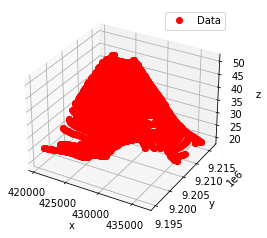

In [3]:
Xi, Yi = ABL[:,0], ABL[:,1]
Zi = ABL[:,2]


import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(Xi, Yi, Zi, "or", label='Data')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

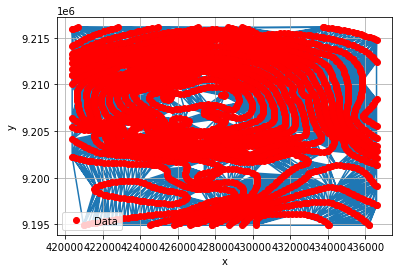

In [4]:
from scipy.spatial import Delaunay
Pi = np.array([Xi, Yi]).transpose()
tri = Delaunay(Pi)
plt.triplot(Xi, Yi , tri.simplices.copy())
plt.plot(Xi, Yi, "or", label = "Data")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
N = 100
x = np.linspace(0., 1., N)
y = np.linspace(0., 1., N)
X, Y = np.meshgrid(x, y)
P = np.array(ABL[:,0].flatten(), ABL[:,1].flatten())
plt.plot(Xi, Yi, "or", label = "Data")
plt.triplot(Xi, Yi , tri.simplices.copy())
plt.plot(X.flatten(), Y.flatten(), "g,", label = "Z = ?")
plt.legend()
plt.grid()
plt.show()

TypeError: Cannot construct a dtype from an array

In [7]:
from scipy.interpolate import griddata
PP = np.array(Xi,Yi)
Z_nearest = griddata(ABL, Zi, P, method = "nearest").reshape([N, N])
plt.contourf(X, Y, Z_nearest, 50)
plt.plot(Xi, Yi, "or", label = "Data")
plt.colorbar()
plt.legend()
plt.grid()
plt.show()

TypeError: Cannot construct a dtype from an array

In [3]:
res = np.loadtxt(str('./Downloads/Gravity/outputs/compressed_residual.txt'))

In [4]:
print(len(res))

100


In [5]:
print(np.shape(res))

(100, 100)


<function matplotlib.pyplot.show(close=None, block=None)>

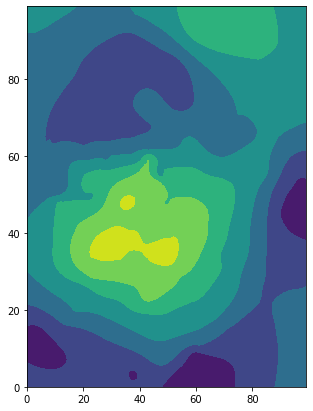

In [6]:
fig = plt.figure(figsize=(5,7))
plt.contourf(res)
plt.show

In [7]:
print(np.array(res))

[[-5.29  -5.38  -5.47  ... -0.991 -0.756 -0.541]
 [-5.72  -5.83  -5.93  ... -1.06  -0.818 -0.597]
 [-6.16  -6.29  -6.41  ... -1.12  -0.876 -0.652]
 ...
 [ 0.398  0.44   0.471 ...  1.71   1.56   1.44 ]
 [ 0.484  0.53   0.565 ...  1.69   1.55   1.44 ]
 [ 0.568  0.618  0.658 ...  1.67   1.55   1.44 ]]


In [8]:
res2 = np.flipud(res)

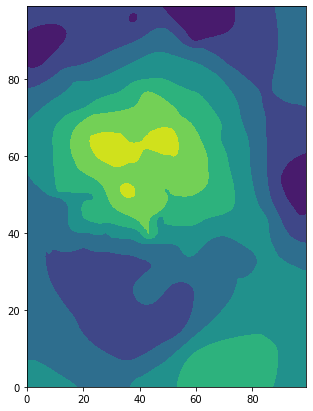

In [9]:
fig = plt.figure(figsize=(5,7))
plt.contourf(res2)
plt.show()

In [10]:
# dir_path = os.path.dirname('./Downloads/Gravity/').split(os.path.sep)
# dir_path = os.path.sep.join(dir_path) + os.path.sep

# fname = dir_path
a = np.savetxt('data_upward.txt', res2)

In [11]:
x = np.linspace(420377.9273, 436589.4035, 100)
y = np.linspace(9194952.47, 9216129.513, 100)

x1, y1 = np.meshgrid(x,y)

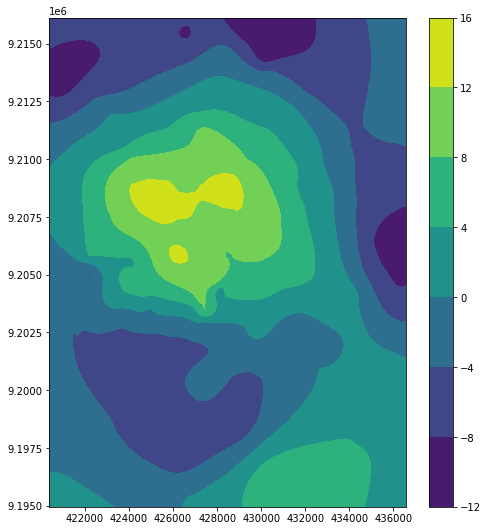

In [14]:
fig = plt.figure(figsize=(8,9))
plt.contourf(x1,y1,res2,cmap='viridis')
plt.colorbar()
plt.show()

In [15]:
u = np.column_stack((x1.flatten(), y1.flatten(), res2.flatten()))

In [16]:
print(u)

[[ 4.20377927e+05  9.19495247e+06  5.68000000e-01]
 [ 4.20541680e+05  9.19495247e+06  6.18000000e-01]
 [ 4.20705432e+05  9.19495247e+06  6.58000000e-01]
 ...
 [ 4.36261899e+05  9.21612951e+06 -9.91000000e-01]
 [ 4.36425651e+05  9.21612951e+06 -7.56000000e-01]
 [ 4.36589404e+05  9.21612951e+06 -5.41000000e-01]]


In [17]:
np.savetxt('koor_upward_compressed.txt', u)

In [18]:
print(res2)

[[ 0.568  0.618  0.658 ...  1.67   1.55   1.44 ]
 [ 0.484  0.53   0.565 ...  1.69   1.55   1.44 ]
 [ 0.398  0.44   0.471 ...  1.71   1.56   1.44 ]
 ...
 [-6.16  -6.29  -6.41  ... -1.12  -0.876 -0.652]
 [-5.72  -5.83  -5.93  ... -1.06  -0.818 -0.597]
 [-5.29  -5.38  -5.47  ... -0.991 -0.756 -0.541]]


In [19]:
x1, y1, res2 = np.savetxt(dataa.txt)

NameError: name 'dataa' is not defined

In [30]:
import pandas as pd
m1 = x1
m2 = y1
m3 = res2

pd.DataFrame(np.array([m1,m2,m3]).T, columns=['X','Y','Z'])

ValueError: Must pass 2-d input. shape=(200, 200, 3)

In [31]:
reshape = np.ravel(res2)

In [32]:
print(reshape)

[ 0.60969206  0.63706541  0.66187608 ... -0.64550177 -0.54059094
 -0.44129706]


In [34]:
np.shape(res2)

(200, 200)

In [35]:
np.shape(x1)

(200, 200)

In [36]:
np.shape(y1)

(200, 200)

In [38]:
flat = res2.flatten()

In [39]:
print(flat)

[ 0.60969206  0.63706541  0.66187608 ... -0.64550177 -0.54059094
 -0.44129706]
